# DETERMINING LVH

 Our aim in this project is to build a model for predicting a person whether he/she has LVH or not. 
 We will choose one of the classification algorithms in supervised machine learning.

#                              DATA WRANGLING

In [1]:
#Loading libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('data_problem_A.data')
data.head()

,5.70,?,3.70,58.00,?.1,?.2,249.30,456.47,Normal.
0,7.70,6.60,?,20.00,?,?,260.92,443.43,LVH.
1,6.20,4.30,4.60,59.00,?,?,255.63,478.96,LVH.
2,5.70,4.40,3.80,49.00,?,?,195.28,381.94,Normal.
3,9.10,?,4.60,17.00,?,?,259.55,395.67,LVH.
4,6.60,5.60,5.20,28.00,?,?,343.32,630.72,LVH.


In [3]:
names = pd.read_csv('data_problem_A.names')
names

,LVH,Normal. | class names
0,LVIDD: continuous. | LV end-diastolic dim,NaN
1,LVIDS: continuous. | LV end-systolic dim,NaN
2,LA: continuous. | left atrial size,NaN
3,EF: continuous. | ejection fraction,NaN
4,MA_DEC: continuous. | mitral inflow dece...,NaN
5,EA_RATIO: continuous. | mitral E to A ratio,NaN
6,MWS: continuous. | meridional wall st...,NaN
7,CWS: continuous. | circumferential wa...,NaN


# DATA PREPROCESSING METHODS

In [4]:
# Column names should be assigned in this order below:
# ['LVIDD','LVIDS','LA','EF','MA_DEC','EA_RATIO','MWS','CWS','class_names']

data = pd.read_csv('data_problem_A.data',names=['LVIDD','LVIDS','LA','EF','MA_DEC',
                                                'EA_RATIO','MWS','CWS','class_names'])
data.head()

,LVIDD,LVIDS,LA,EF,MA_DEC,EA_RATIO,MWS,CWS,class_names
0,5.70,?,3.70,58.00,?,?,249.30,456.47,Normal.
1,7.70,6.60,?,20.00,?,?,260.92,443.43,LVH.
2,6.20,4.30,4.60,59.00,?,?,255.63,478.96,LVH.
3,5.70,4.40,3.80,49.00,?,?,195.28,381.94,Normal.
4,9.10,?,4.60,17.00,?,?,259.55,395.67,LVH.


In [5]:
print('Number of row in data:{}\nNumber of row in names:{}'.format(len(data),len(names)))

Number of row in data:778
Number of row in names:8


In [6]:
#VARIABLES NEED TO BE CONVERTED TO CORRECT DATA TYPE(FLOAT)
data.dtypes.value_counts()

object    9
dtype: int64

# MISSING VALUES AND COLUMNS

In [7]:
def unknown(x):
    return sum(x=='?')
data.apply(unknown)

LVIDD          182
LVIDS          213
LA             250
EF              10
MA_DEC         504
EA_RATIO       503
MWS             16
CWS             20
class_names      0
dtype: int64

In [8]:
data[data=='?'] = np.nan
data = data.fillna('NaN')
data.head()

,LVIDD,LVIDS,LA,EF,MA_DEC,EA_RATIO,MWS,CWS,class_names
0,5.70,NaN,3.70,58.00,NaN,NaN,249.30,456.47,Normal.
1,7.70,6.60,NaN,20.00,NaN,NaN,260.92,443.43,LVH.
2,6.20,4.30,4.60,59.00,NaN,NaN,255.63,478.96,LVH.
3,5.70,4.40,3.80,49.00,NaN,NaN,195.28,381.94,Normal.
4,9.10,NaN,4.60,17.00,NaN,NaN,259.55,395.67,LVH.


In [9]:
data['LVH_normal'] = data['class_names'].map({'LVH.': 1, 'Normal.': 0})
data.head(10)

,LVIDD,LVIDS,LA,EF,MA_DEC,EA_RATIO,MWS,CWS,class_names,LVH_normal
0,5.70,NaN,3.70,58.00,NaN,NaN,249.30,456.47,Normal.,0
1,7.70,6.60,NaN,20.00,NaN,NaN,260.92,443.43,LVH.,1
2,6.20,4.30,4.60,59.00,NaN,NaN,255.63,478.96,LVH.,1
3,5.70,4.40,3.80,49.00,NaN,NaN,195.28,381.94,Normal.,0
4,9.10,NaN,4.60,17.00,NaN,NaN,259.55,395.67,LVH.,1
5,6.60,5.60,5.20,28.00,NaN,NaN,343.32,630.72,LVH.,1
6,4.30,2.80,3.70,60.00,NaN,NaN,128.20,276.00,Normal.,0
7,NaN,NaN,NaN,46.00,NaN,NaN,190.98,381.41,Normal.,0
8,6.70,5.70,NaN,31.00,NaN,NaN,NaN,NaN,LVH.,1
9,5.90,NaN,NaN,18.00,NaN,NaN,136.40,271.91,LVH.,1


In [10]:
data.dtypes.value_counts()

object    9
int64     1
dtype: int64

In [11]:
#It is time to convert object data types to float.

data['LVIDD'] = data['LVIDD'].astype(float)
data['LVIDS'] = data['LVIDS'].astype(float)
data['LA'] = data['LA'].astype(float)
data['EF'] = data['EF'].astype(float)
data['MA_DEC'] = data['MA_DEC'].astype(float)
data['EA_RATIO'] = data['EA_RATIO'].astype(float)
data['MWS'] = data['MWS'].astype(float)
data['CWS'] = data['CWS'].astype(float)

In [12]:
#Let`s check it out now.

data.dtypes.value_counts()

float64    8
object     1
int64      1
dtype: int64

# EXPLORATORY DATA ANALYSIS (EDA)

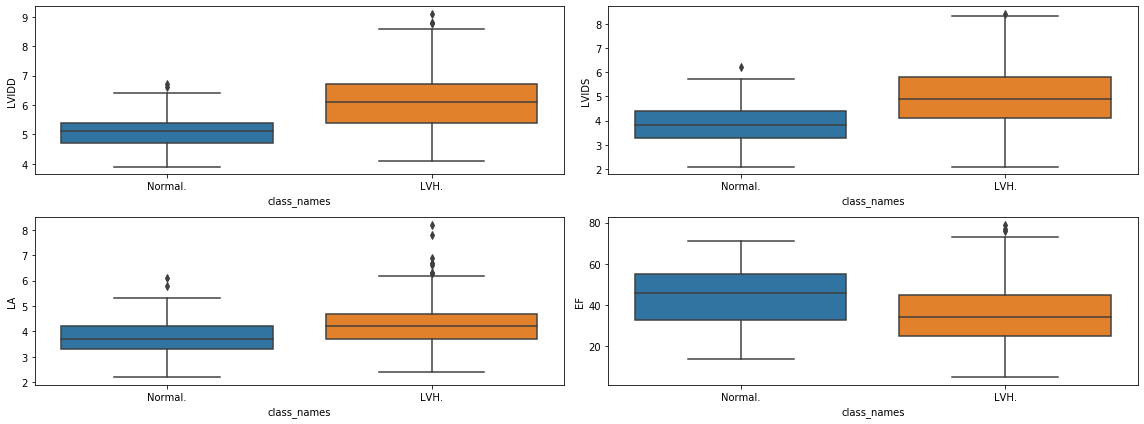

In [13]:
fig, ((a,b),(c,d))= plt.subplots(2,2,figsize=(16,6))
sns.boxplot(y='LVIDD',x='class_names',data=data,ax=a)
sns.boxplot(y='LVIDS',x='class_names',data=data,ax=b)
sns.boxplot(y='LA',x='class_names',data=data,ax=c)
sns.boxplot(y='EF',x='class_names',data=data,ax=d)
plt.tight_layout()

Graph above shows some dominant dependent variables in determining LVH or not.
There is a clear difference(distinction) between normal and LVH when we compare LVIDD values so that LVIDD is a definetly significant feature whether a person has LVH or not. LVIDS is another factor we can not ignore.
We also should consider by checking EF.We actually see that the EF of the patients with LVH are low.
However,there is an inverse impact on LHV.

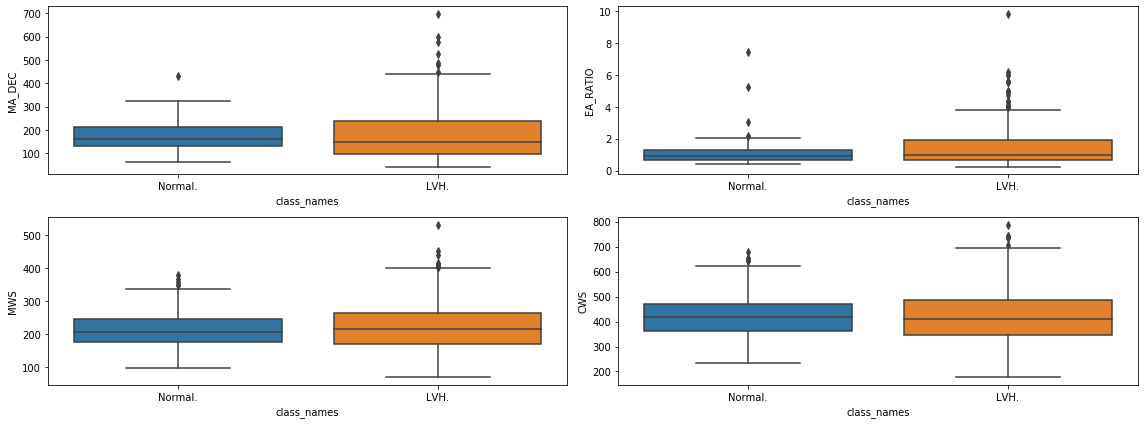

In [14]:
fig, ((a,b),(c,d))= plt.subplots(2,2,figsize=(16,6))
sns.boxplot(y='MA_DEC',x='class_names',data=data,ax=a)
sns.boxplot(y='EA_RATIO',x='class_names',data=data,ax=b)
sns.boxplot(y='MWS',x='class_names',data=data,ax=c)
sns.boxplot(y='CWS',x='class_names',data=data,ax=d)
plt.tight_layout()

Values of normal and LHV are overlapping in terms of MA-DEC.
I will ignore MA-DEC values since most of them are missing and overlapping values.

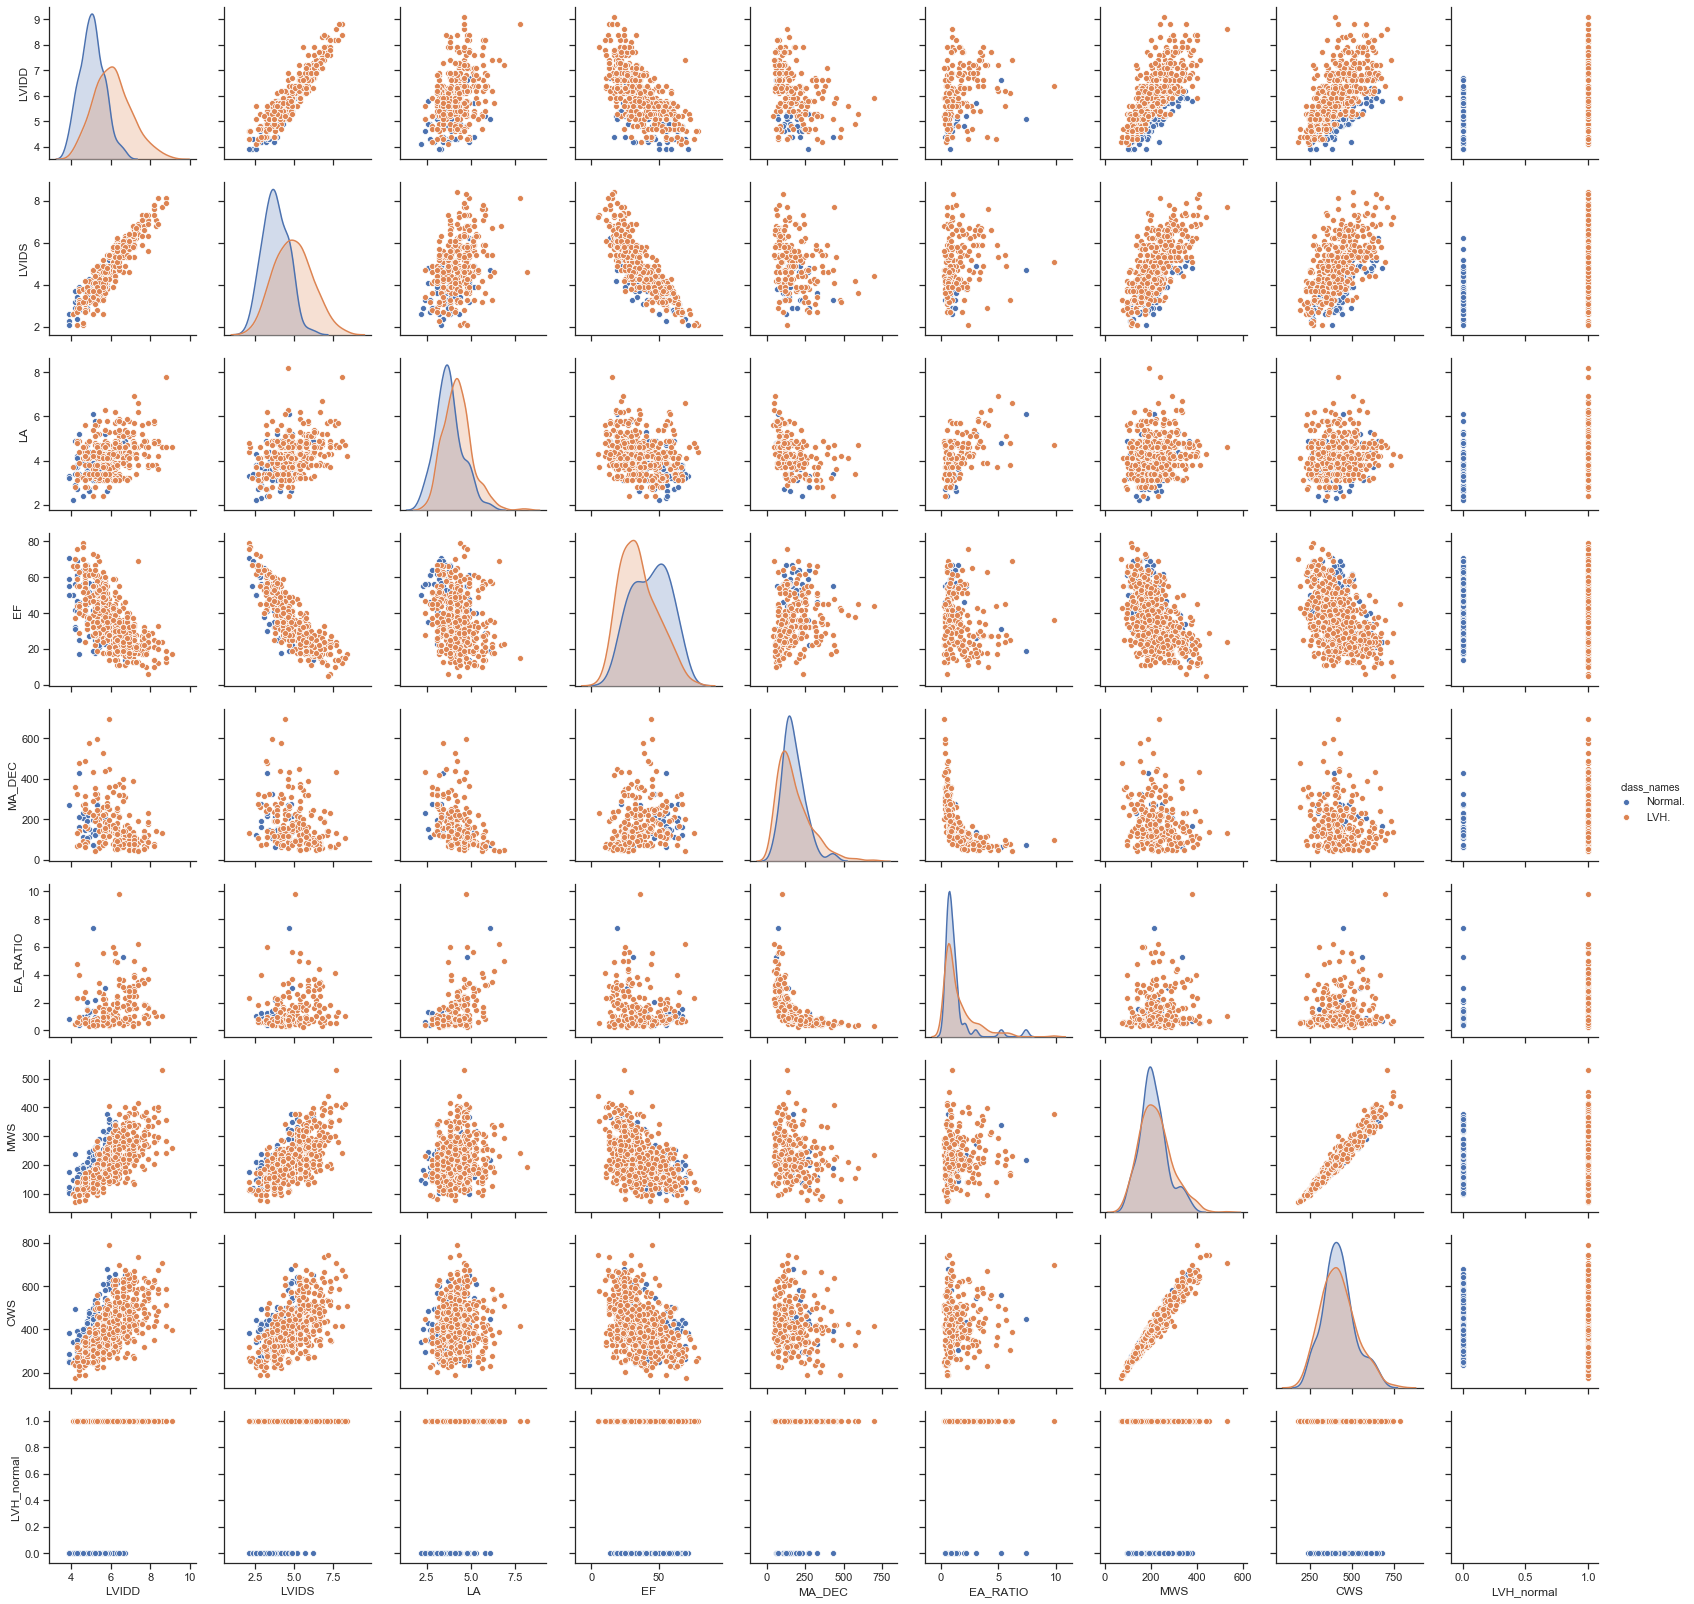

In [15]:
import warnings
warnings.filterwarnings('ignore')
#I want to check pair relationships depend on class names.
sns.set_context('poster')
sns.set(style="ticks", color_codes=True)
sns.pairplot(data,hue='class_names')

REMARKABLE OUTCOMES FROM PAIRPLOT GRAPH  
A graph showing the distribution of normal(blue) and LHV(orange) values depending on variables. 

There are some features especially LVIDD and LVIDS that really cause having LVH in a positive way.
There is a strong positive linearship between LVIDD and LVIDS that make an impact in same way. 

I also realize that there is an inverse ratio between ejection fraction (EF) and patiologic(LHV).
This is being supported by strong negative linearship between EF and LVIDS.

Another statistical result is the lower the ea ratio, the higher the risk of disease.

In [16]:
# Let`s see the correlation table below.
# It helps us to understand mathematically what kind of relationship between features.
correlation = data.corr()
correlation

,LVIDD,LVIDS,LA,EF,MA_DEC,EA_RATIO,MWS,CWS,LVH_normal
LVIDD,1.000000,0.927745,0.381542,-0.662069,-0.326368,0.246252,0.689533,0.568410,0.411677
LVIDS,0.927745,1.000000,0.378561,-0.847876,-0.259162,0.176615,0.672509,0.562676,0.364705
LA,0.381542,0.378561,1.000000,-0.287708,-0.416758,0.500338,0.160760,0.121076,0.224251
EF,-0.662069,-0.847876,-0.287708,1.000000,0.196010,-0.171842,-0.499491,-0.437495,-0.233383
MA_DEC,-0.326368,-0.259162,-0.416758,0.196010,1.000000,-0.566762,-0.176236,-0.146997,0.011854
EA_RATIO,0.246252,0.176615,0.500338,-0.171842,-0.566762,1.000000,0.142137,0.137155,0.075852
MWS,0.689533,0.672509,0.160760,-0.499491,-0.176236,0.142137,1.000000,0.969209,0.054171
CWS,0.568410,0.562676,0.121076,-0.437495,-0.146997,0.137155,0.969209,1.000000,-0.011523
LVH_normal,0.411677,0.364705,0.224251,-0.233383,0.011854,0.075852,0.054171,-0.011523,1.000000


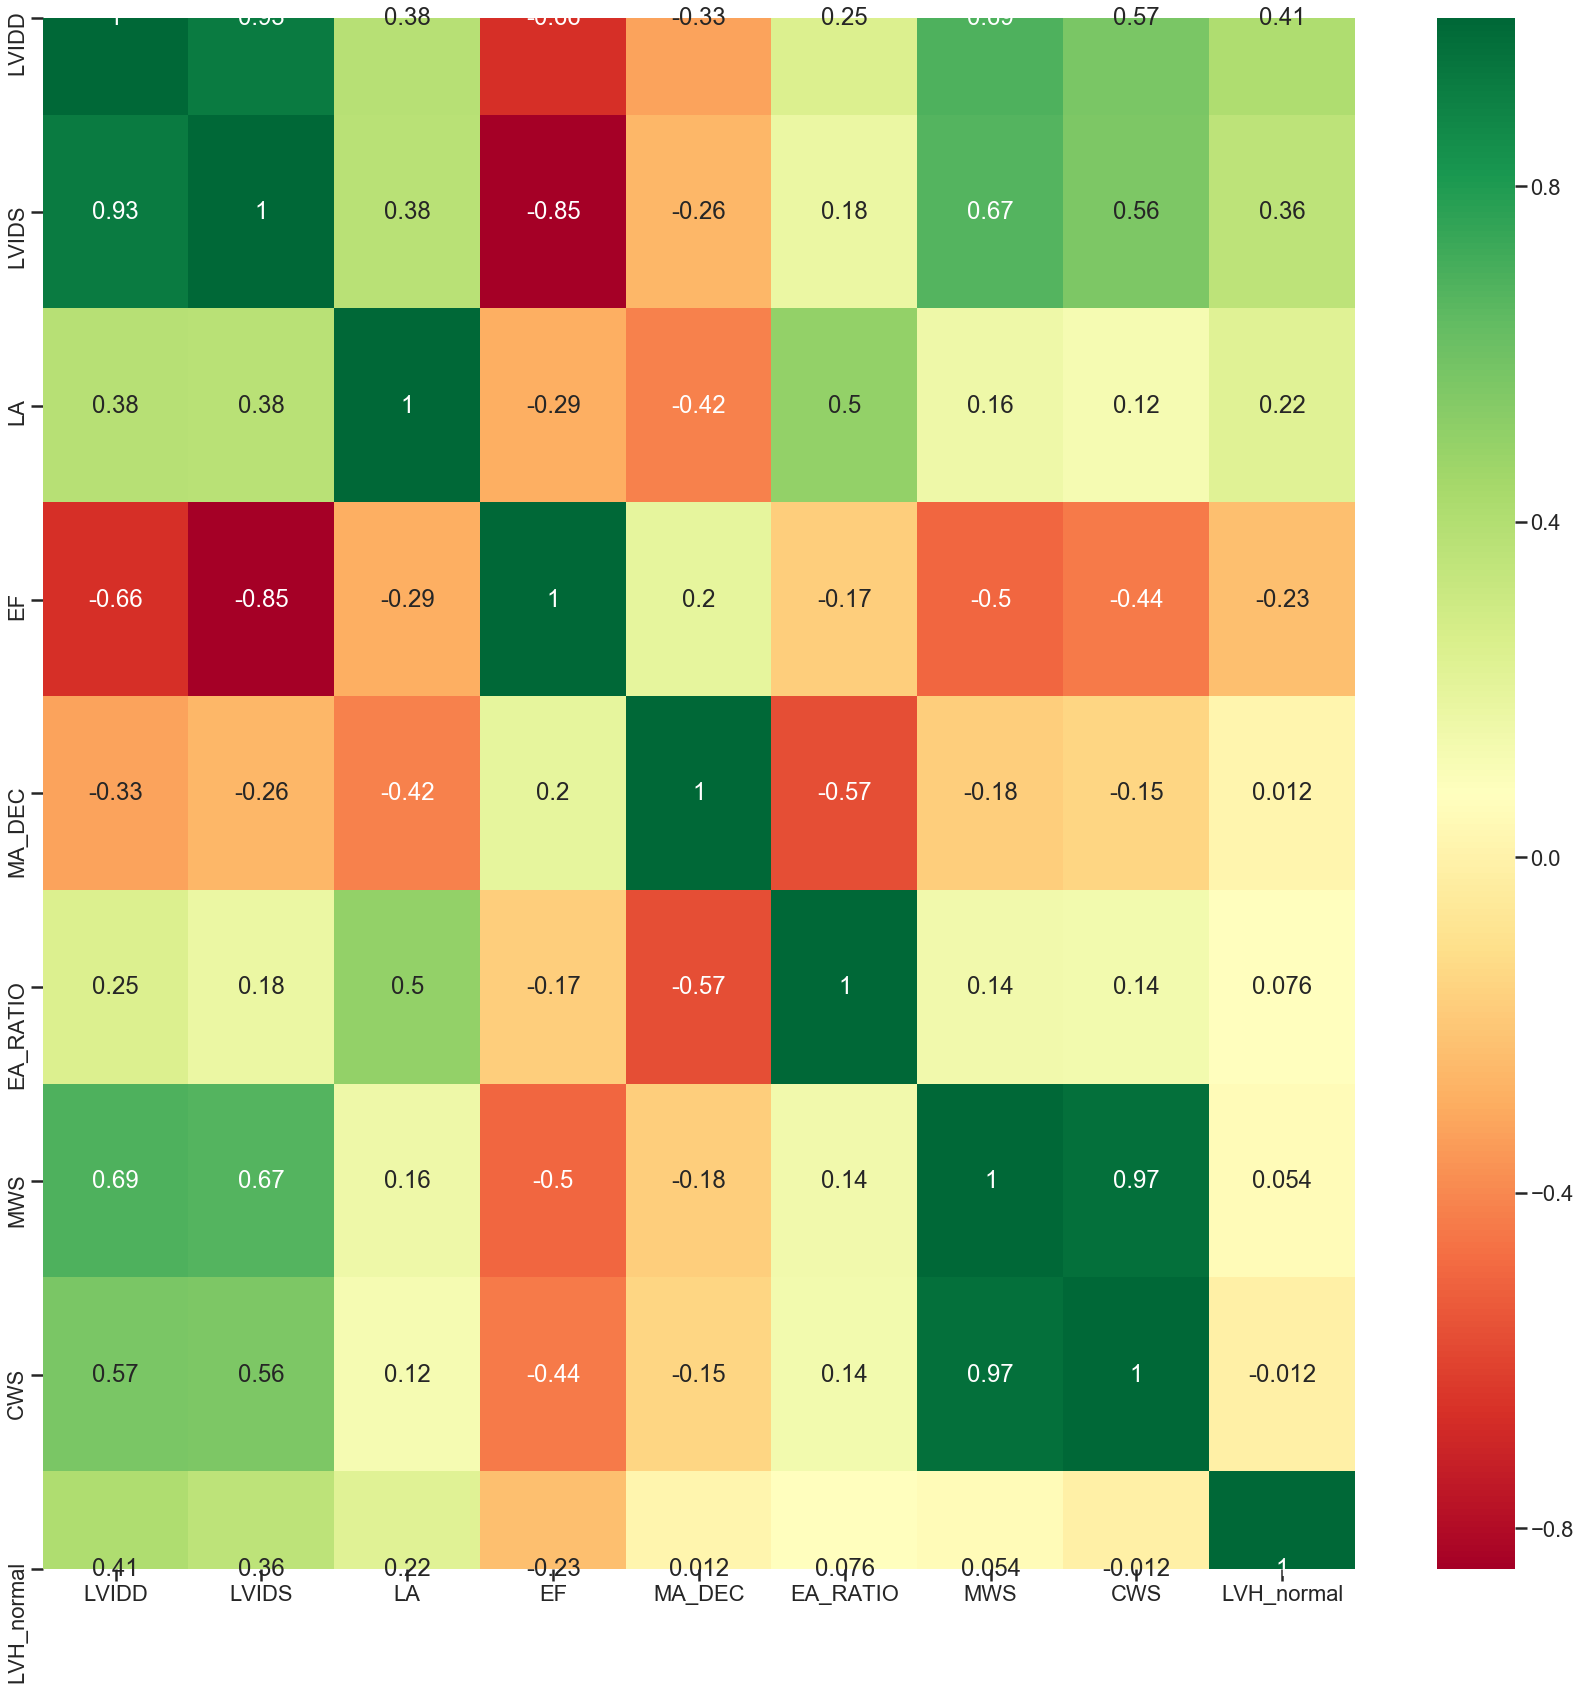

In [17]:
#How do the columns affect LVH?
top_cor_features = correlation.index
plt.figure(figsize=(24,24))
sns.set_context('poster')
sns.heatmap(data[top_cor_features].corr(),annot=True,cmap='RdYlGn')
plt.tight_layout()

The heatmap above shows clearly correlation among the features.
LVIDD-LVIDS-LA are independent values that affect LVH in positive direction.
On the other hand,EF has an inverse impact on the patologic situation.
Beside,we can ignore MA-DEC column due to less impact in addition %65 missing values.

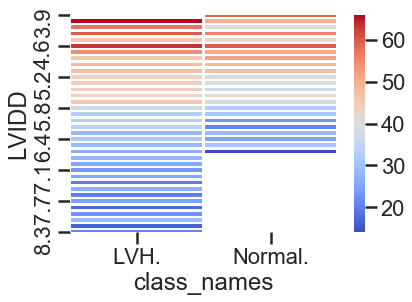

In [18]:
df1 = data.pivot_table(index='LVIDD',columns='class_names',values='EF')
sns.heatmap(df1,cmap='coolwarm',linewidths=1.5)

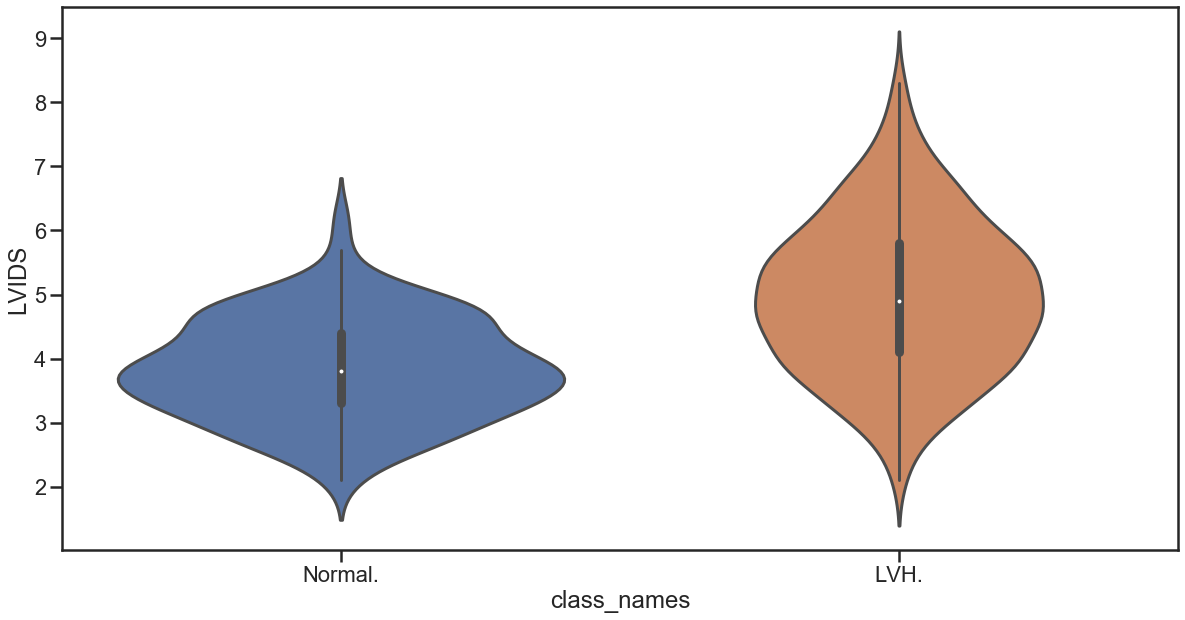

In [19]:
fig,ax = plt.subplots(figsize=(20,10))
sns.set_context('poster')
fig = sns.violinplot(x='class_names',y='LVIDS',data=data)

Values of people with LVH are higher than normal people.
Value range in LVH is way wider than normal people.
There might be different factors on it later on to be analyzed.
LVH has more outliers or marjinal values since upper and lower edges are sharper. 

# STATISTICAL INFERENCES

In [20]:
data.describe()

,LVIDD,LVIDS,LA,EF,MA_DEC,EA_RATIO,MWS,CWS,LVH_normal
count,596.000000,565.000000,528.000000,768.000000,274.000000,275.000000,762.000000,758.000000,778.000000
mean,5.913423,4.753097,4.174432,36.881510,179.394161,1.497818,220.332808,420.421161,0.816195
std,0.980767,1.223359,0.837119,14.372681,107.244362,1.366011,69.137602,103.712913,0.387574
min,3.900000,2.100000,2.200000,5.000000,42.000000,0.250000,69.520000,176.880000,0.000000
25%,5.200000,3.800000,3.600000,25.000000,107.000000,0.655000,172.402500,348.567500,1.000000
50%,5.800000,4.700000,4.100000,35.000000,151.000000,0.970000,210.815000,412.150000,1.000000
75%,6.450000,5.600000,4.700000,47.000000,228.000000,1.820000,258.280000,482.687500,1.000000
max,9.100000,8.400000,8.200000,79.000000,696.000000,9.800000,531.710000,788.180000,1.000000


In [21]:
# Let`s see the correlation table below.
# It helps us to understand mathematically what kind of relationship between features.
correlation = data.corr()
correlation

,LVIDD,LVIDS,LA,EF,MA_DEC,EA_RATIO,MWS,CWS,LVH_normal
LVIDD,1.000000,0.927745,0.381542,-0.662069,-0.326368,0.246252,0.689533,0.568410,0.411677
LVIDS,0.927745,1.000000,0.378561,-0.847876,-0.259162,0.176615,0.672509,0.562676,0.364705
LA,0.381542,0.378561,1.000000,-0.287708,-0.416758,0.500338,0.160760,0.121076,0.224251
EF,-0.662069,-0.847876,-0.287708,1.000000,0.196010,-0.171842,-0.499491,-0.437495,-0.233383
MA_DEC,-0.326368,-0.259162,-0.416758,0.196010,1.000000,-0.566762,-0.176236,-0.146997,0.011854
EA_RATIO,0.246252,0.176615,0.500338,-0.171842,-0.566762,1.000000,0.142137,0.137155,0.075852
MWS,0.689533,0.672509,0.160760,-0.499491,-0.176236,0.142137,1.000000,0.969209,0.054171
CWS,0.568410,0.562676,0.121076,-0.437495,-0.146997,0.137155,0.969209,1.000000,-0.011523
LVH_normal,0.411677,0.364705,0.224251,-0.233383,0.011854,0.075852,0.054171,-0.011523,1.000000


LVIDD,LVIDS and LA are the features that most affect LVH and directly proportionals.
EF and having LVH is inversely related to each other generally.
These numbers and all graps above prove each other.

In [22]:
lvh = data[data['class_names']== 'LVH.']
normal = data[data['class_names']== 'Normal.']

In [23]:
lvh.sort_values(by=['LVIDD'], axis=0, ascending=False).head(10)

,LVIDD,LVIDS,LA,EF,MA_DEC,EA_RATIO,MWS,CWS,class_names,LVH_normal
4,9.1,NaN,4.6,17.0,NaN,NaN,259.55,395.67,LVH.,1
417,8.8,8.1,7.8,15.0,NaN,NaN,240.32,416.95,LVH.,1
11,8.8,NaN,NaN,13.0,NaN,NaN,283.73,512.30,LVH.,1
501,8.8,7.9,4.6,19.0,NaN,NaN,355.39,584.27,LVH.,1
367,8.6,7.7,4.6,24.0,134.0,1.02,531.71,708.06,LVH.,1
740,8.4,NaN,3.6,20.0,NaN,NaN,349.42,585.49,LVH.,1
652,8.4,8.1,4.9,12.0,NaN,NaN,403.41,674.43,LVH.,1
714,8.4,6.9,4.2,33.0,NaN,NaN,295.82,486.05,LVH.,1
489,8.4,NaN,4.8,24.0,NaN,NaN,392.42,568.49,LVH.,1
447,8.3,6.8,4.8,21.0,NaN,NaN,239.79,465.62,LVH.,1


In [24]:
lvh.sort_values(by=['EF'], axis=0, ascending=False).head(10)

,LVIDD,LVIDS,LA,EF,MA_DEC,EA_RATIO,MWS,CWS,class_names,LVH_normal
31,4.6,2.1,4.4,79.0,NaN,NaN,113.87,270.48,LVH.,1
734,4.6,2.2,4.6,77.0,NaN,NaN,117.04,253.90,LVH.,1
765,4.3,2.1,4.8,76.0,132.0,2.36,139.73,319.02,LVH.,1
196,5.1,2.6,NaN,73.0,NaN,NaN,173.27,357.65,LVH.,1
88,5.3,2.8,4.6,72.0,NaN,NaN,177.96,363.67,LVH.,1
250,4.2,NaN,NaN,70.0,NaN,NaN,69.52,176.88,LVH.,1
160,4.6,NaN,4.1,70.0,NaN,NaN,140.45,309.99,LVH.,1
28,5.4,NaN,NaN,69.0,203.0,0.64,146.90,276.47,LVH.,1
681,7.4,NaN,6.6,69.0,44.0,6.20,231.82,388.37,LVH.,1
684,4.7,2.7,3.1,67.0,273.0,0.83,141.12,296.58,LVH.,1


In [25]:
normal.sort_values(by=['LVIDD'], axis=0, ascending=False).head(10)

,LVIDD,LVIDS,LA,EF,MA_DEC,EA_RATIO,MWS,CWS,class_names,LVH_normal
163,6.7,6.2,4.9,14.0,NaN,NaN,368.04,652.14,Normal.,0
572,6.6,NaN,4.8,31.0,61.0,5.26,338.08,560.94,Normal.,0
774,6.4,5.7,NaN,25.0,NaN,NaN,273.42,496.82,Normal.,0
756,6.3,4.8,4.8,29.0,NaN,NaN,323.19,614.09,Normal.,0
211,6.2,NaN,NaN,21.0,NaN,NaN,349.30,655.69,Normal.,0
278,6.1,NaN,3.1,23.0,NaN,NaN,337.90,566.36,Normal.,0
68,5.9,4.9,3.7,34.0,NaN,NaN,348.10,624.61,Normal.,0
530,5.9,5.2,NaN,21.0,NaN,NaN,358.85,642.55,Normal.,0
497,5.9,4.6,NaN,39.0,NaN,NaN,326.23,584.14,Normal.,0
50,5.8,4.8,NaN,24.0,168.0,0.64,378.67,678.42,Normal.,0


In [26]:
normal.sort_values(by=['EF'], axis=0, ascending=False).head(10)

,LVIDD,LVIDS,LA,EF,MA_DEC,EA_RATIO,MWS,CWS,class_names,LVH_normal
178,3.9,2.1,3.3,71.0,NaN,NaN,176.92,382.82,Normal.,0
667,NaN,NaN,3.2,69.0,NaN,NaN,198.32,429.20,Normal.,0
207,4.3,2.4,3.4,69.0,NaN,NaN,120.39,264.79,Normal.,0
666,NaN,NaN,NaN,69.0,NaN,NaN,153.45,323.15,Normal.,0
331,4.8,NaN,3.6,67.0,163.0,1.53,142.65,304.16,Normal.,0
356,NaN,2.6,3.8,67.0,125.0,1.00,209.62,441.36,Normal.,0
116,4.8,2.8,NaN,66.0,NaN,NaN,194.13,414.49,Normal.,0
529,4.3,2.7,3.8,66.0,NaN,NaN,184.90,392.31,Normal.,0
515,4.8,3.1,NaN,65.0,NaN,NaN,154.27,314.06,Normal.,0
709,NaN,2.9,2.8,64.0,275.0,1.27,199.77,425.01,Normal.,0


These four datasets above make me think 4 values(LVIDD-LVIDS-LA-EF) play a decisive role in LHV detection.
I am not of the opinion that the others have contributed a lot.
After all these four values are taken into account, EA ratio may also help.

# MACHINE LEARNING PART

In [27]:
data.head()

,LVIDD,LVIDS,LA,EF,MA_DEC,EA_RATIO,MWS,CWS,class_names,LVH_normal
0,5.7,NaN,3.7,58.0,NaN,NaN,249.30,456.47,Normal.,0
1,7.7,6.6,NaN,20.0,NaN,NaN,260.92,443.43,LVH.,1
2,6.2,4.3,4.6,59.0,NaN,NaN,255.63,478.96,LVH.,1
3,5.7,4.4,3.8,49.0,NaN,NaN,195.28,381.94,Normal.,0
4,9.1,NaN,4.6,17.0,NaN,NaN,259.55,395.67,LVH.,1


In [28]:
#Let`s check missing value rate
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(9)

,Total,Percent
MA_DEC,504,0.647815
EA_RATIO,503,0.646530
LA,250,0.321337
LVIDS,213,0.273779
LVIDD,182,0.233933
CWS,20,0.025707
MWS,16,0.020566
EF,10,0.012853
LVH_normal,0,0.000000


In [29]:
#Fill in missing values with median due to limited time.
#I would probably use Regression imputation or Stochastic regression imputation but it takes time. 
data['LVIDD'] = data['LVIDD'].fillna(data['LVIDD'].median())
data['LVIDS'] = data['LVIDS'].fillna(data['LVIDS'].median())
data['LA'] = data['LA'].fillna(data['LA'].median())
data['EF'] = data['EF'].fillna(data['EF'].median())
data['EA_RATIO'] = data['EA_RATIO'].fillna(data['EA_RATIO'].median())
data['CWS'] = data['CWS'].fillna(data['CWS'].median())
data['MWS'] = data['MWS'].fillna(data['MWS'].median())
data['MA_DEC'] = data['MA_DEC'].fillna(data['MA_DEC'].median())

In [30]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(9)

,Total,Percent
LVH_normal,0,0.0
class_names,0,0.0
CWS,0,0.0
MWS,0,0.0
EA_RATIO,0,0.0
MA_DEC,0,0.0
EF,0,0.0
LA,0,0.0
LVIDS,0,0.0


In [31]:
data.head()

,LVIDD,LVIDS,LA,EF,MA_DEC,EA_RATIO,MWS,CWS,class_names,LVH_normal
0,5.7,4.7,3.7,58.0,151.0,0.97,249.30,456.47,Normal.,0
1,7.7,6.6,4.1,20.0,151.0,0.97,260.92,443.43,LVH.,1
2,6.2,4.3,4.6,59.0,151.0,0.97,255.63,478.96,LVH.,1
3,5.7,4.4,3.8,49.0,151.0,0.97,195.28,381.94,Normal.,0
4,9.1,4.7,4.6,17.0,151.0,0.97,259.55,395.67,LVH.,1


# BUILDING BASELINE MODEL

In [32]:
#Importing required libraries for ML 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [33]:
num_cal = data[['LVIDD','LVIDS','LA','EF','MA_DEC','EA_RATIO','MWS','CWS']]
target_col = data[['LVH_normal']]

In [34]:
new_data = data.drop(['class_names'], axis=1)
new_data.head()

,LVIDD,LVIDS,LA,EF,MA_DEC,EA_RATIO,MWS,CWS,LVH_normal
0,5.7,4.7,3.7,58.0,151.0,0.97,249.30,456.47,0
1,7.7,6.6,4.1,20.0,151.0,0.97,260.92,443.43,1
2,6.2,4.3,4.6,59.0,151.0,0.97,255.63,478.96,1
3,5.7,4.4,3.8,49.0,151.0,0.97,195.28,381.94,0
4,9.1,4.7,4.6,17.0,151.0,0.97,259.55,395.67,1


In [35]:
#Seting feature and target columns

x = num_cal.values
y = target_col.values
x.shape[0]== y.shape[0]

True

In [92]:
#Split data as train and test set

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 38)

# DECISION TREE

In [93]:
dtc = DecisionTreeClassifier(criterion='entropy',random_state=38)
dtc.fit(X_train,y_train)

y_pred = dtc.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
cm

array([[ 23,  17],
       [ 19, 175]])

In [94]:
round(accuracy_score(y_test,y_pred),2)

0.85

# KNN

In [95]:
import warnings
warnings.filterwarnings('ignore')

knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski')
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
cm

array([[  4,  36],
       [  5, 189]])

In [96]:
round(accuracy_score(y_test,y_pred),2)

0.82

# RANDOM FOREST

In [97]:
import warnings
warnings.filterwarnings('ignore')

rfc = RandomForestClassifier(random_state=38)
rfc.fit(X_train,y_train)

y_pred = rfc.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
cm

array([[ 18,  22],
       [ 12, 182]])

In [98]:
round(accuracy_score(y_test,y_pred),2)

0.85

# LOGISTIC REGRESSION

In [99]:
import warnings
warnings.filterwarnings('ignore')

logr = LogisticRegressionCV(random_state=38)
logr.fit(X_train,y_train)

y_pred = logr.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
cm

array([[ 17,  23],
       [ 12, 182]])

In [100]:
round(accuracy_score(y_test,y_pred),3)

0.85

# GRADIENT BOOSTING

In [101]:
gbc = GradientBoostingClassifier(random_state=38)
gbc.fit(X_train,y_train)

y_pred = gbc.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
cm

array([[ 20,  20],
       [ 11, 183]])

In [102]:
round(accuracy_score(y_test,y_pred),2)

0.87

# XGBOOST

In [116]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

y_predxgb = xgb.predict(X_test)

cm = confusion_matrix(y_test,y_predxgb)
cm

array([[ 19,  21],
       [  8, 186]])

In [117]:
round(accuracy_score(y_test,y_predxgb),2)

0.88

I decide to finalize my model with XGBoost that predicts 88% correctly because sum of false positive and false negative is low in comparasion with other models.(21+8=29)

# MODEL TUNNING

In [118]:
#Import necessary modules
from sklearn.model_selection import RandomizedSearchCV

# Setup the hyperparameter grid

p = {'n_estimators':[50,100,150],
          'min_child_weight': [1, 5, 10],
          'learning_rate':[0.05,0.1,0.15,0.2],
          'gamma': [0.5, 1, 1.5, 2, 5],
          'max_depth': [3, 4, 5]
        }

# Instantiate a XGBoosting classifier
xgb = XGBClassifier(random_state=38)

# Instantiate the RandomizedSearchCV object
gs = RandomizedSearchCV(estimator = xgb,param_distributions= p,scoring='accuracy',cv=5,random_state=38)

# Fit it to the data
gs.fit(X_train,y_train)

# Print the tuned parameters and score
print('Tuned XGboosting Parameters: {}'.format(gs.best_params_))
print("Best score is {}".format(gs.best_score_))

Tuned XGboosting Parameters: {'n_estimators': 150, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 2}
Best score is 0.8731617647058824


In [121]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predxgb))

              precision    recall  f1-score   support

           0       0.70      0.47      0.57        40
           1       0.90      0.96      0.93       194

    accuracy                           0.88       234
   macro avg       0.80      0.72      0.75       234
weighted avg       0.87      0.88      0.87       234



The model`s accuracy that I build is 88%.It seems very satisfying but we also should consider other metrics.
Sensivity and specificty in other words TP rate and FP rates are really significant.
We need to check ROC and AUC.We have seen actually 90% precision in determining LVH.
This is really fantastic result that gives us hope that we can improve the model.
The reason of 0.57 at f1-score for normal people is imbalanced data that we had  before lots of missing values.
Naturally, this imbalanced data(0.57) is affecting recall value for normal people.
Overall,our model is very good in terms of sensivity but it needs to be improved for specificity.

# ROC

In [129]:
#Receiver Operator Characteristic(ROC) provides a simple way to summarize confusion matrix.
from sklearn.metrics import roc_curve

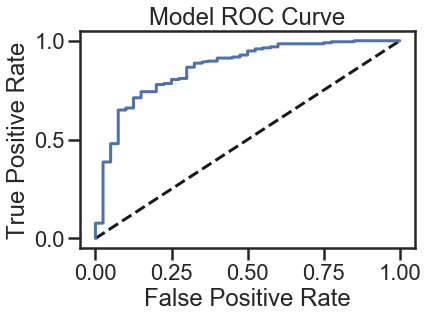

In [142]:
y_pred_prob = xgb.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Model ROC Curve')
plt.show()

# AUC using Cross-Validation

In [144]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(logr,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores

array([0.81410256, 0.93910256, 0.67628205, 0.88782051, 0.79934211])

If the AUC is greater than 0.5, the model is better than random guessing. Always a good sign!
Luckily we do not have any value is less than 0.5.This makes our model more meaningful in labelling correctly.

# RESULT

--- I reached almost 90% accuracy with a dataset that had lots of missing data.

--- There are especially some features such as LVIDD,LVIDS,LA directly proportional with LHV.

--- Enjection Fraction (EF) is also a critic value to decide whether a person has LHV or not.

--- EF is inversely proportional with LHV.

--- Some features (MA-DEC,CWS) in the dataset have a little effect.

--- I found out some outcomes from graphs after than confirmed with a SME. 